In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score 

### Multiple Linear Regression Machine Learning Model
#### We are creating a multiple linear regression machine learning model to predict "Sold Price" based on type, style, features, list price, date, and some other parameters. 

In [22]:
# Importing the data from SQLite database into a DataFrame
house_df = pd.read_sql_table('sold_homes', 'sqlite:///sold_homes.db').drop(columns=['index'])
house_df.head()

,#,LSC,EC,St#,Street Name,Abbr,Dir,Municipality,Community,List Price,...,Fam,Kit,Garage Type,A/C,Heat,Contract Date,Sold Date,List Brokerage,Co op Brokerage,MLS#
0,1,Sld,None,38.0,Scarsdale,Crt,None,Brampton,Bram West,"$5,99,000",...,N,1,Built-,Cen,Gas,16-03-2021,23-03-2021,RE/MAX WEST,RE/MAX REALTY,W5153139
1,2,Sld,None,55.0,Corby,Cres,None,Brampton,Bram West,"$5,99,900",...,N,1,None,Cen,Oil,23-02-2021,26-02-2021,RE/MAX REAL,HOMELIFE/MIRA,W5125388
2,3,Sld,None,7.0,Manett,Cres,None,Brampton,Bram West,"$6,99,000",...,N,1,Attach,Cen,Gas,21-01-2021,26-01-2021,RE/MAX REAL,HOMELIFE/MIRA,W5091089
3,4,Sld,None,76.0,Fairglen,Ave,None,Brampton,Bram West,"$6,99,500",...,N,1,None,Cen,Gas,16-03-2021,17-03-2021,"EXP REALTY,",ROYALSTARRE,W5153813
4,5,Sld,None,121.0,Richwood,Cres,None,Brampton,Bram West,"$6,99,900",...,N,1,Built-,Cen,Gas,21-02-2021,26-02-2021,RE/MAX REAL,ROYAL LEPAGE,W5123258


In [23]:
# Checking date data types of columns
house_df.dtypes

#                    int64
LSC                 object
EC                  object
St#                float64
Street Name         object
Abbr                object
Dir                 object
Municipality        object
Community           object
List Price          object
Sold Price          object
Type                object
Style               object
Br                   int64
 "+"                 int64
Wr                   int64
Fam                 object
Kit                  int64
Garage Type         object
A/C                 object
Heat                object
Contract Date       object
Sold Date           object
List Brokerage      object
Co op Brokerage     object
MLS#                object
dtype: object

In [24]:
# Drop the non-beneficial columns
house_df = house_df.drop(["#","LSC","EC","St#","Dir","Municipality","Community","MLS#","Abbr","List Brokerage","Co op Brokerage","Street Name","Heat","A/C"],1)
house_df.head()

,List Price,Sold Price,Type,Style,Br,"""+""",Wr,Fam,Kit,Garage Type,Contract Date,Sold Date
0,"$5,99,000","$6,81,000",Att/Row/Tw,2-Storey,3,0,2,N,1,Built-,16-03-2021,23-03-2021
1,"$5,99,900","$7,67,000",Semi-Detac,Bungalow,3,1,2,N,1,None,23-02-2021,26-02-2021
2,"$6,99,000","$8,18,500",Att/Row/Tw,2-Storey,3,1,3,N,1,Attach,21-01-2021,26-01-2021
3,"$6,99,500","$7,26,000",Semi-Detac,Bungalow,2,1,2,N,1,None,16-03-2021,17-03-2021
4,"$6,99,900","$7,31,000",Att/Row/Tw,2-Storey,3,0,3,N,1,Built-,21-02-2021,26-02-2021


In [25]:
# Converting "List Price" and "Sold Price" to float type
house_df["List Price"] = house_df["List Price"].replace('[\$,]', '', regex=True).astype(int)
house_df["Sold Price"] = house_df["Sold Price"].replace('[\$,]', '', regex=True).astype(int)
house_df.head()

,List Price,Sold Price,Type,Style,Br,"""+""",Wr,Fam,Kit,Garage Type,Contract Date,Sold Date
0,599000,681000,Att/Row/Tw,2-Storey,3,0,2,N,1,Built-,16-03-2021,23-03-2021
1,599900,767000,Semi-Detac,Bungalow,3,1,2,N,1,None,23-02-2021,26-02-2021
2,699000,818500,Att/Row/Tw,2-Storey,3,1,3,N,1,Attach,21-01-2021,26-01-2021
3,699500,726000,Semi-Detac,Bungalow,2,1,2,N,1,None,16-03-2021,17-03-2021
4,699900,731000,Att/Row/Tw,2-Storey,3,0,3,N,1,Built-,21-02-2021,26-02-2021


In [26]:
# Convert "Contract Date" and "Sold Date" to datetime type
house_df["Contract Date"] = pd.to_datetime(house_df["Contract Date"], format='%d-%m-%Y')
house_df["Sold Date"] = pd.to_datetime(house_df["Sold Date"], format='%d-%m-%Y')
house_df.head()

,List Price,Sold Price,Type,Style,Br,"""+""",Wr,Fam,Kit,Garage Type,Contract Date,Sold Date
0,599000,681000,Att/Row/Tw,2-Storey,3,0,2,N,1,Built-,2021-03-16,2021-03-23
1,599900,767000,Semi-Detac,Bungalow,3,1,2,N,1,None,2021-02-23,2021-02-26
2,699000,818500,Att/Row/Tw,2-Storey,3,1,3,N,1,Attach,2021-01-21,2021-01-26
3,699500,726000,Semi-Detac,Bungalow,2,1,2,N,1,None,2021-03-16,2021-03-17
4,699900,731000,Att/Row/Tw,2-Storey,3,0,3,N,1,Built-,2021-02-21,2021-02-26


In [27]:
house_df.dtypes

List Price                int32
Sold Price                int32
Type                     object
Style                    object
Br                        int64
 "+"                      int64
Wr                        int64
Fam                      object
Kit                       int64
Garage Type              object
Contract Date    datetime64[ns]
Sold Date        datetime64[ns]
dtype: object

In [28]:
# Determine the number of unique values in each column
house_cat = house_df.dtypes[house_df.dtypes == "object"].index.tolist()
house_df[house_cat].nunique()

Type           3
Style          8
Fam            3
Garage Type    5
dtype: int64

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(house_df[house_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(house_cat)
encode_df.head()

,Type_Att/Row/Tw,Type_Detached,Type_Semi-Detac,Style_1 1/2 Stor,Style_2-Storey,Style_3-Storey,Style_Backsplit,Style_Bungaloft,Style_Bungalow,Style_Bungalow-R,Style_Sidesplit,Fam_ y,Fam_N,Fam_y,Garage Type_Attach,Garage Type_Built-,Garage Type_Carpor,Garage Type_Detach,Garage Type_None
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
# Merge one-hot encoded features and drop the originals
house_df = house_df.merge(encode_df,left_index=True, right_index=True)
house_df = house_df.drop(house_cat,1)
house_df.head()

,List Price,Sold Price,Br,"""+""",Wr,Kit,Contract Date,Sold Date,Type_Att/Row/Tw,Type_Detached,...,Style_Bungalow-R,Style_Sidesplit,Fam_ y,Fam_N,Fam_y,Garage Type_Attach,Garage Type_Built-,Garage Type_Carpor,Garage Type_Detach,Garage Type_None
0,599000,681000,3,0,2,1,2021-03-16,2021-03-23,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,599900,767000,3,1,2,1,2021-02-23,2021-02-26,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,699000,818500,3,1,3,1,2021-01-21,2021-01-26,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,699500,726000,2,1,2,1,2021-03-16,2021-03-17,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,699900,731000,3,0,3,1,2021-02-21,2021-02-26,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
# Converting the 'Contract Date' and 'Sold Date' to interger type
house_df['Contract Date'] = house_df['Contract Date'].dt.strftime("%d%m%Y").astype(int) 
house_df['Sold Date'] = house_df['Sold Date'].dt.strftime("%d%m%Y").astype(int)

In [32]:
# Scaling the data using StandardScaler()
data_scaler = StandardScaler()
house_data_scaled = data_scaler.fit_transform(house_df)
house_df_scaled = pd.DataFrame(data=house_data_scaled,index=house_df.index,columns=house_df.columns)
house_df_scaled

,List Price,Sold Price,Br,"""+""",Wr,Kit,Contract Date,Sold Date,Type_Att/Row/Tw,Type_Detached,...,Style_Bungalow-R,Style_Sidesplit,Fam_ y,Fam_N,Fam_y,Garage Type_Attach,Garage Type_Built-,Garage Type_Carpor,Garage Type_Detach,Garage Type_None
0,-1.448810,-1.461507,-1.042931,-0.987865,-2.037981,-0.100759,-0.009537,0.877201,1.849925,-1.372610,...,-0.100759,-0.071067,-0.071067,1.876893,-1.849925,-0.975182,1.078445,-0.071067,-0.176318,-0.123718
1,-1.446766,-1.255993,-1.042931,0.203560,-2.037981,-0.100759,0.789656,1.207708,-0.540562,-1.372610,...,-0.100759,-0.071067,-0.071067,1.876893,-1.849925,-0.975182,-0.927261,-0.071067,-0.176318,8.082904
2,-1.221686,-1.132923,-1.042931,0.203560,-1.046396,-0.100759,0.559845,1.206603,1.849925,-1.372610,...,-0.100759,-0.071067,-0.071067,1.876893,-1.849925,1.025449,-0.927261,-0.071067,-0.176318,-0.123718
3,-1.220550,-1.353971,-2.484203,0.203560,-2.037981,-0.100759,-0.009537,0.213976,-0.540562,-1.372610,...,-0.100759,-0.071067,-0.071067,1.876893,-1.849925,-0.975182,-0.927261,-0.071067,-0.176318,8.082904
4,-1.219642,-1.342022,-1.042931,-0.987865,-1.046396,-0.100759,0.560989,1.207708,1.849925,-1.372610,...,-0.100759,-0.071067,-0.071067,1.876893,-1.849925,-0.975182,1.078445,-0.071067,-0.176318,-0.123718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2.410032,2.402649,1.839614,-0.987865,0.936774,-0.100759,1.705470,-1.442981,-0.540562,0.728539,...,-0.100759,-0.071067,-0.071067,-0.532795,0.540562,-0.975182,1.078445,-0.071067,-0.176318,-0.123718
195,2.866552,2.526914,-1.042931,-0.987865,-1.046396,-0.100759,1.257282,-0.008204,-0.540562,0.728539,...,-0.100759,-0.071067,-0.071067,1.876893,-1.849925,-0.975182,-0.927261,-0.071067,5.671567,-0.123718
196,2.868823,2.538862,0.398342,1.394985,0.936774,-0.100759,1.363612,-1.331338,-0.540562,0.728539,...,-0.100759,-0.071067,-0.071067,-0.532795,0.540562,-0.975182,1.078445,-0.071067,-0.176318,-0.123718
197,3.298088,3.064598,0.398342,0.203560,0.936774,-0.100759,0.104796,0.656126,-0.540562,0.728539,...,-0.100759,-0.071067,-0.071067,-0.532795,0.540562,1.025449,-0.927261,-0.071067,-0.176318,-0.123718


In [33]:
# Split our preprocessed data into our features and target arrays
y = house_df_scaled["Sold Price"].values.reshape(-1, 1)
X = house_df_scaled.drop(columns=["Sold Price"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
# Create a model with scikit-learn and fit the data in the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# The model creates predicted y values based on X values
y_pred = model.predict(X_test)
print(y_pred.shape)

(50, 1)


In [37]:
# Calculating R2 score or coefficient of determination (The closer 1, the better the fit)
test_set_r2 = r2_score(y_test, y_pred)
print('coefficient of determination:',test_set_r2)

coefficient of determination: 0.970580097301931


In [42]:
# Calculating RMSE or root mean square error (the lower value is, the better the fit)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error {}".format(rmse))

Mean Squared Error 0.144161757219068


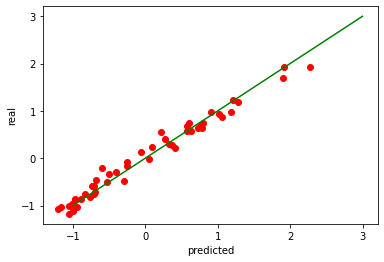

<module 'matplotlib.pyplot' from 'C:\\Users\\Sanket\\anaconda3\\envs\\mlenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [47]:
# Plotting graph between real and predicted values
def plot_real_vs_predicted(y_test,y_pred):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([-1,3],[-1,3], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()
    return plt

plot_real_vs_predicted(y_test,y_pred)